# Introducción

Para este proyecto, interpreté data del Servicio de Parques Nacionales de Estados Unidos, sobre especies en peligro de extinción.

Trabajé con el análisis de datos en el estado de conservación de las especies en esta base de datos, e investigué si hay patrones o características comunes sobre los tipos de especies que están actualmente en peligro. Durante este proyecto, procedí  a analizar, limpiar, y visualizar data así como a formular preguntas a las que intenté responder de manera contundente.



## Configuración del proyecto

Siempre es importante configurar el alcance del proyecto antes de iniciar. En este caso, constaba de cuatro etapas: Objetivos, acciones y data disponibles, el análisis propiamente dicho, y la evaluación de los resultados de cada paso para sacar conclusiones y comunicar descubrimientos de una manera efectiva.


### 1. Objetivos del proyecto

Los objetivos para este proyecto eran los siguientes:

-Realizar el análisis de datos en las especies y su estado de conservación de la base de datos del Servicio de Parques Nacionales.
-Investigar si hay patrones o características comunes sobre los tipos de especies que se encuentran en peligro.
-Entender las características sobre las especies y su estado de conservación, y sobre esas especies y su relación con los parques nacionales.

### 2. Acciones y data

Las acciones que se tomaron para trabajar tomando en cuenta los objetivos del proyecto fueron el análisis de dos bases de datos provistas por CodeCademy.com, llamadas Observations.csv y Species_info.csv, así como una tercera base de datos, Joined_table.csv, que consiste en las dos previamente mencionadas unidas en una sola tabla, para obtener todavía más información relevante.

### 3. Análisis

Inicialmente, el análisis estuvo conducido por las siguientes preguntas:

- Cuántas especies están en cada tipo de estado de conservación? Como están distribuídas?
- Qué categoría de especies está más comprometida? Y cuales categoríes no lo están tanto?
- En qué Parque Nacional se vio la mayor cantidad de especies en peligro de extinción?
- Hay ciertos tipos de especies que son más propensas a estar en peligro?
- Las diferencias entre las especies y su estado de conservación son estadísticamente significantes?
- Qué especie tiene más prevalencia en las observaciones y cuál es su distribución en los diferentes parques?


### 4. Evaluación

Finalmente, es vital reveer los objetivos y chequear si el resultado del análisis corresponde a las preguntas hechas previamente para ser respondidas (en la sección de los objetivos). Esta sección refleja lo aprendido a lo largo del proceso, y si hay alguna pregunta que no pudo ser respondida. También puede incluirse las limitaciones o si algún tipo de análisis podría haber sido resuelto usando diferente metodología.

# Importando los Módulos

Lo primero que había que hacer, es importar los Módulos de Python para ser usados en este proyecto.

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

# Cargar las bases de datos

Para empezar mi trabajo, importé la data que usaremos para trabajar.

En este caso, las bases de datos son tres:

### Observations.csv:
Este archivo contiene información sobre avistamientos de especies en cuatro Parques Nacionales en los últimos 7 días. Las columnas de la tabla son las siguientes:

-**scientific_name**: El nombre de cada especie.

-**park_name**: El Parque Nacional donde esos avistamientos específicos fueron registrados.

-**observations**: El número de avistamientos en el período de 7 días.

En la misma línea donde leemos el archivo .csv con la librería Pandas, también descarté las filas duplicadas.

In [2]:
observations = pd.read_csv('observations.csv').drop_duplicates().reset_index()
observations.head()

,index,scientific_name,park_name,observations
0,0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,1,Neovison vison,Great Smoky Mountains National Park,77
2,2,Prunus subcordata,Yosemite National Park,138
3,3,Abutilon theophrasti,Bryce National Park,84
4,4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
#También podemos ver la longitud de la base de datos, y ver si hay valores vacíos (null-values)
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23281 entries, 0 to 23280
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            23281 non-null  int64 
 1   scientific_name  23281 non-null  object
 2   park_name        23281 non-null  object
 3   observations     23281 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 727.7+ KB


### Species_info.csv:
Este archivo contiene información sobre las especies que fueron vistas en los Parques Nacionales. Las columnas son las siguientes:

-**category**: La categoría en la que las especies están clasificadas.

-**scientific_name**: El nombre científico de cada especie.

-**common_names**: El nombre por el que cada especie es más comúnmente conocida..

-**conservation_status**: El nivel de peligro (o no) de cada especie.

En este caso, me ocupé de descartar las filas duplicadas pero tomando en cuenta la columna de nombre científico, para estar seguro de no estar trabajando con la misma especie dos veces en la misma base de datos.

In [4]:
species_info = pd.read_csv("species_info.csv").drop_duplicates(subset = ['scientific_name']).reset_index()
species_info.head(5)

,index,category,scientific_name,common_names,conservation_status
0,0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,1,Mammal,Bos bison,"American Bison, Bison",NaN
2,2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle",NaN
3,3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [5]:
#Imprimiendo la información de esta tabla, podemos sacar nuestra primera observación. Sólo 178 filas son de especies en peligro.

print(species_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5541 entries, 0 to 5540
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                5541 non-null   int64 
 1   category             5541 non-null   object
 2   scientific_name      5541 non-null   object
 3   common_names         5541 non-null   object
 4   conservation_status  178 non-null    object
dtypes: int64(1), object(4)
memory usage: 216.6+ KB
None


In [6]:
#Con una acción realizada en SQL (hecha en DB Browser para SQLite), hice una unión cruzada de ambas bases de datos,
#para terminar con otro archivo .csv, llamado joined_table

joined_table = pd.read_csv("joinedtable.csv").drop_duplicates().reset_index()
joined_table.head()

,index,scientific_name,common_names,category,park_name,observations,conservation_status
0,0,Vicia benghalensis,"Purple Vetch, Reddish Tufted Vetch",Vascular Plant,Great Smoky Mountains National Park,68,NaN
1,1,Neovison vison,American Mink,Mammal,Great Smoky Mountains National Park,77,NaN
2,2,Prunus subcordata,Klamath Plum,Vascular Plant,Yosemite National Park,138,NaN
3,3,Abutilon theophrasti,Velvetleaf,Vascular Plant,Bryce National Park,84,NaN
4,4,Githopsis specularioides,Common Bluecup,Vascular Plant,Great Smoky Mountains National Park,85,NaN


## Analizando las bases de datos

Lo primero a hacer era explorar la tabla de especies para obtener cuantas categorías hay en ella. Además, es posible conocer cuantos estados de conservación hay, y cuántas de las 5541 especies se encuentran en cada estado de conservación.

In [7]:
print("Número de categorías: " + str(species_info.category.nunique()))
different_categories = species_info.category.unique()
print("Las diferentes categorías en la base de datos de especies son: {}".format(different_categories))

Número de categorías: 7
Las diferentes categorías en la base de datos de especies son: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [8]:
#Rápidamente encontré que las plantas vasculares son por lejos la categoría más común en esta base de datos.

species_info.groupby('category').size().sort_values(ascending=False)

category
Vascular Plant       4262
Bird                  488
Nonvascular Plant     333
Mammal                176
Fish                  125
Amphibian              79
Reptile                78
dtype: int64

Tras una primera mirada a las categorías,quise ver cuántas de estas especies están en situación de peligro. Como el Servicio de Parques Nacionales debía estar más interesado en este tipo de especies mucho más que las que no lo están, dejé los valores vacíos (NaN) sin completar por el momento, para que los gráficos puedan reflejar mejor lo que realmente debería notarse.

In [9]:
types_of_conservation = species_info.conservation_status.unique()
print("Los diferentes tipos de estado de conservación son: "+ str(types_of_conservation))

Los diferentes tipos de estado de conservación son: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [10]:
conservation_status_count = species_info.groupby("conservation_status").index.count()
conservation_status_sorted = conservation_status_count.sort_values(ascending = False)
print(conservation_status_sorted)

conservation_status
Species of Concern    151
Endangered             15
Threatened              9
In Recovery             3
Name: index, dtype: int64


Con esta información, procedí a hacer la primera visualización. El gráfico de torta puede dar una buena impresión sobre como las especies en preocupación (Species of Concern) son muchas más que cualquier otra categoría de especies en peligro.

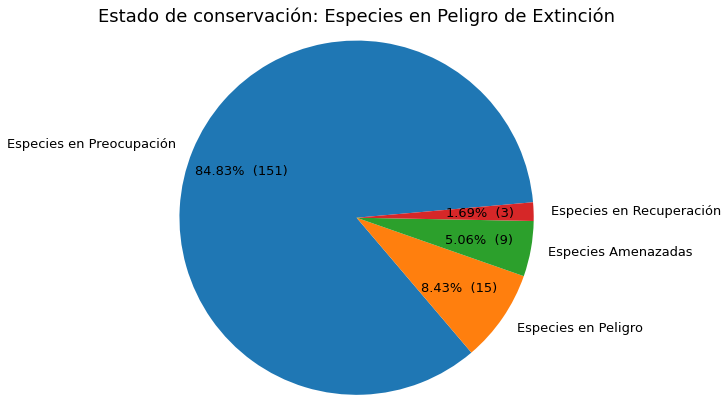

In [11]:
species_of_concern = 0
endangered = 0
threatened = 0
in_recovery = 0
not_endangered = 0

for item in species_info.conservation_status:
    if item == "Species of Concern":
        species_of_concern +=1
    elif item == "Endangered":
        endangered += 1
    elif item == "Threatened":
        threatened +=1
    elif item == "In Recovery":
        in_recovery += 1
    else:
        not_endangered +=1
        
list_to_bar = [species_of_concern, endangered, threatened,in_recovery]
labels_to_bar = "Especies en Preocupación", "Especies en Peligro", "Especies Amenazadas", "Especies en Recuperación"

def make_autopct(values):
       def my_autopct(pct):
           total = sum(values)
           val = int(round(pct*total/100.0))
           return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
       return my_autopct

plt.figure(figsize = (7,7))
plt.pie(list_to_bar, labels = labels_to_bar, autopct = make_autopct(list_to_bar), pctdistance =0.7, startangle = 5,  textprops={'fontsize': 13})
plt.axis("equal")
plt.title("Estado de conservación: Especies en Peligro de Extinción", fontsize = (18))
plt.show()

Un segundo gráfico era muy útil para ser añadido a este análisis. Después de mostrar como es la distribución del estado de conservación en las especies en peligro, hice un gráfico de barras para visualizar la cantidad de cada categoría de especies que estaban en peligro de extinción.

category
Bird                 75
Vascular Plant       46
Mammal               30
Fish                 10
Amphibian             7
Reptile               5
Nonvascular Plant     5
Name: conservation_status, dtype: int64


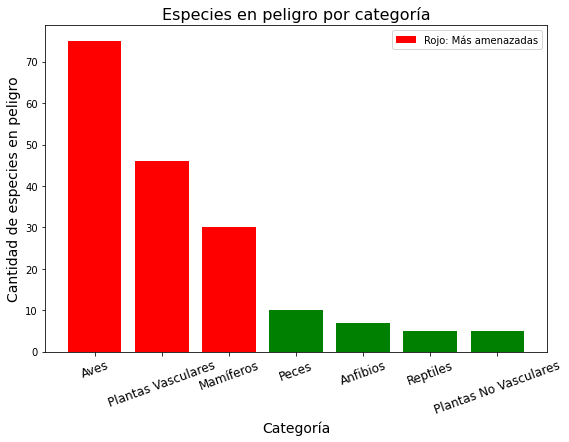

In [12]:
most_endangered = species_info.groupby("category").conservation_status.count()
most_endangered_sorted = most_endangered.sort_values(ascending = False)
print(most_endangered_sorted)
labels = ['Aves', 'Plantas Vasculares', 'Mamíferos', 'Peces', 'Anfibios', 'Reptiles', 'Plantas No Vasculares']


plt.figure(figsize = (9,6))
ax = plt.subplot(1,1,1)
plt.bar(range(len(most_endangered_sorted)), most_endangered_sorted, color = ['red', 'red', 'red', 'green', 'green', 'green', 'green'])
plt.xlabel("Categoría", size = 14)
plt.ylabel("Cantidad de especies en peligro", size = 14)
plt.title("Especies en peligro por categoría", size = 16)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation = 20, size = 12)
plt.legend(["Rojo: Más amenazadas"])
plt.show()

Terminados los dos gráficos, hice un gráfico de barras más combinando toda esta información en una sola visualización. Aquí, podemos tener todavía más conclusiones para compartir.

In [13]:
conservationcategories = species_info.groupby(["conservation_status", "category"]).scientific_name.count().unstack()

conservationcategories

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,6.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,NaN,NaN,NaN,NaN
Species of Concern,4.0,68.0,4.0,22.0,5.0,5.0,43.0
Threatened,2.0,NaN,3.0,2.0,NaN,NaN,2.0


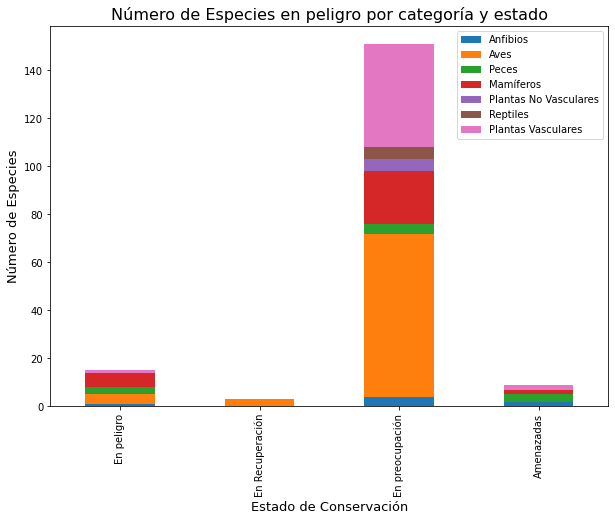

In [14]:
ax = conservationcategories.plot.bar(figsize=(10,7), stacked=True)
plt.xlabel("Estado de Conservación", size = 13)
plt.ylabel("Número de Especies", size = 13)
plt.title("Número de Especies en peligro por categoría y estado", size = 16)
plt.legend(['Anfibios', 'Aves', 'Peces', 'Mamíferos', 'Plantas No Vasculares', 'Reptiles', 'Plantas Vasculares'])
ax.set_xticklabels(['En peligro', 'En Recuperación', 'En preocupación', 'Amenazadas'])
plt.show()

A partir de estos resultados, me hice otra pregunta sobre la cantidad de especies en peligro, que fue cuántas especies de cada categoría estaban en camino a quedar extinctas si no se tomaba ninguna acción. El porcentaje era la forma más eficiente de tener la repuesta. 

In [15]:
species_info.fillna('Not in danger', inplace = True)
species_info['is_in_danger'] = species_info.conservation_status != 'Not in danger'

danger_count = species_info.groupby(['category', 'is_in_danger']).scientific_name.nunique().reset_index()
danger_pivoted = danger_count.pivot(columns='is_in_danger',
                                      index='category',
                                      values='scientific_name').reset_index()
danger_pivoted.columns = ['Categoría', 'No_en_peligro', 'En_peligro']
danger_pivoted['Porcentaje'] = round((danger_pivoted.En_peligro/(danger_pivoted.En_peligro + danger_pivoted.No_en_peligro) * 100),2)
print(danger_pivoted)

           Categoría  No_en_peligro  En_peligro  Porcentaje
0          Amphibian             72           7        8.86
1               Bird            413          75       15.37
2               Fish            115          10        8.00
3             Mammal            146          30       17.05
4  Nonvascular Plant            328           5        1.50
5            Reptile             73           5        6.41
6     Vascular Plant           4216          46        1.08


Este cálculo me mostró que la cantidad de especies en cada categoría no tenía nada que ver con el porcentaje de la especies de cada categoría en peligro.

Al llegar a este punto, era una buena idea de probar algunos test de hipítesis para ver si las diferentes categorías tenían diferencias estadísticamente significantes en sus porcentajes de estado de conservación. Trabajé con el **Test Chi Square**. El interalo de confiabilidad que buscaba era del 95%, por lo que el resultado del test que necesitaba era de 0.05 o menos para el valor p (p-value), para saber que las diferencias no eran simplemente determinadas por el azar.

In [16]:
amphibianvsmammal = [[72,7], [146,30]]
_,pval,_,_ = stats.chi2_contingency(amphibianvsmammal)
print (pval)
if pval <= 0.05:
    print("Puedo estar razonablemente seguro de que la diferencia entre ambos porcentajes NO es simplemente por azar")
else:
    print("Puedo estar razonablemente seguro de que la diferencia entre ambos porcentajes ES simplemente por azar")

0.12757669693198975
Puedo estar razonablemente seguro de que la diferencia entre ambos porcentajes ES simplemente por azar


In [17]:
reptilesvsmammal = [[73,5], [146,30]]
_,pval,_,_ = stats.chi2_contingency(reptilesvsmammal)
print (pval)
if pval <= 0.05:
    print("Puedo estar razonablemente seguro de que la diferencia entre ambos porcentajes NO es simplemente por azar")
else:
    print("Puedo estar razonablemente seguro de que la diferencia entre ambos porcentajes ES simplemente por azar")

0.03835559022969898
Puedo estar razonablemente seguro de que la diferencia entre ambos porcentajes NO es simplemente por azar


In [18]:
vascularvsnonvascular = [[4216,46], [328,5]]
_,pval,_,_ = stats.chi2_contingency(vascularvsnonvascular)
print (pval)
if pval <= 0.05:
    print("Puedo estar razonablemente seguro de que la diferencia entre ambos porcentajes NO es simplemente por azar")
else:
    print("Puedo estar razonablemente seguro de que la diferencia entre ambos porcentajes ES simplemente por azar")

0.6623419491381985
Puedo estar razonablemente seguro de que la diferencia entre ambos porcentajes ES simplemente por azar


In [19]:
birdvsfish = [[413,75], [115,10]]
_,pval,_,_ = stats.chi2_contingency(birdvsfish)
print (pval)
if pval <= 0.05:
    print("Puedo estar razonablemente seguro de que la diferencia entre ambos porcentajes NO es simplemente por azar")
else:
    print("Puedo estar razonablemente seguro de que la diferencia entre ambos porcentajes ES simplemente por azar")

0.047482425302318096
Puedo estar razonablemente seguro de que la diferencia entre ambos porcentajes NO es simplemente por azar


Después de todo este trabajo con la base de datos sobre las especies, combiné ambas tablas para visualizar cuantas observaciones de especes fueron hechas los últimos 7 días en cada Parque Nacional.

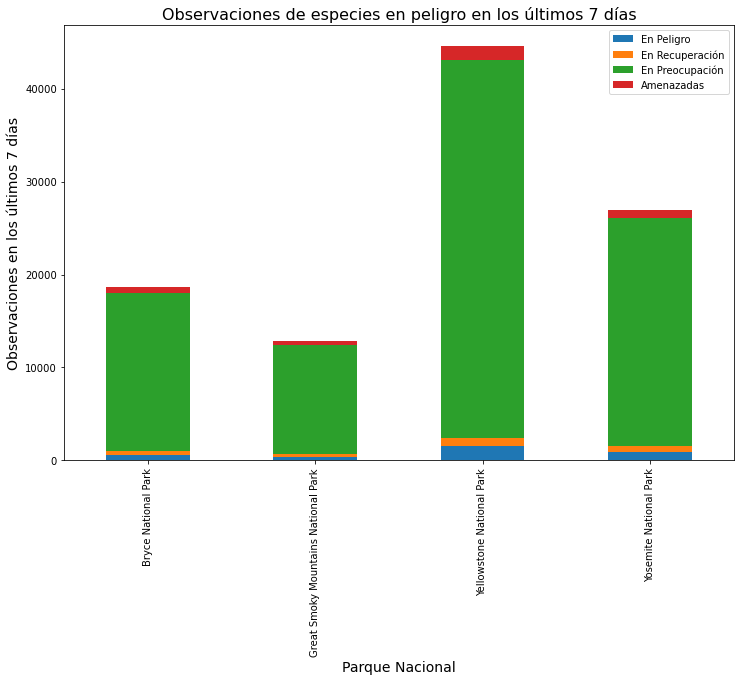

In [20]:
observations_7 = joined_table.groupby(['park_name','conservation_status']).observations.sum().unstack()
ax = observations_7.plot.bar(figsize = (12,8),stacked = True)
plt.xlabel("Parque Nacional", size = 14)
plt.ylabel("Observaciones en los últimos 7 días", size = 14)
plt.title("Observaciones de especies en peligro en los últimos 7 días", size = 16)
plt.legend(['En Peligro', 'En Recuperación', 'En Preocupación', 'Amenazadas'],)
plt.show()

Lo siguiente que hice con la base de datos de observaciones fue crear un cuadro para rápidamente encontrar que especies fueron las más y menos observadas, y dónde se las vio. En la siguiente tabla, con un simple enunciado se la puede ordenar por observaciones en un Parque Nacional específico, lo que puede ser muy útil para trabajar de un modo más dinámico.

In [21]:
observed = observations.groupby('scientific_name').observations.sum().sort_values(ascending = False).reset_index()
observed_by_park = observations.groupby(['scientific_name', 'park_name']).observations.sum().sort_values(ascending = False).reset_index()
observed_by_park_pivot = observed_by_park.pivot(columns = 'park_name',
                                                          index = 'scientific_name',
                                                         values = 'observations')
observed_by_park_pivot['total_observaciones'] = observed_by_park_pivot.sum(axis=1)
most_observed_total = observed_by_park_pivot.sort_values(by = 'total_observaciones', ascending = False)
most_observed_total.head()

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,total_observaciones
scientific_name,,,,,
Holcus lanatus,296,216,805,463,1780
Castor canadensis,278,243,703,501,1725
Hypochaeris radicata,294,195,726,505,1720
Puma concolor,311,239,753,408,1711
Procyon lotor,247,247,745,453,1692


Estuve más tiempo llamando a esa tabla, buscando las especies menos observadas, y también las más observadas por Parque Nacional.

In [22]:
least_observed_total = observed_by_park_pivot.sort_values(by = 'total_observaciones', ascending = True)
least_observed_total.head()

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,total_observaciones
scientific_name,,,,,
Grus americana,24,13,57,37,131
Canis rufus,30,13,60,34,137
Vermivora bachmanii,20,18,58,45,141
Noturus baileyi,22,23,67,31,143
Rana sierrae,31,11,60,42,144


In [23]:
most_observed_bryce = observed_by_park_pivot.sort_values(by = 'Bryce National Park', ascending = False)
most_observed_bryce.head()

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,total_observaciones
scientific_name,,,,,
Columba livia,339,169,722,423,1653
Puma concolor,311,239,753,408,1711
Avena sativa,303,171,453,318,1245
Streptopelia decaocto,301,256,516,457,1530
Myotis lucifugus,298,174,679,396,1547


In [24]:
most_observed_gsmountains = observed_by_park_pivot.sort_values(by = 'Great Smoky Mountains National Park', ascending = False)
most_observed_gsmountains.head()

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,total_observaciones
scientific_name,,,,,
Streptopelia decaocto,301,256,516,457,1530
Procyon lotor,247,247,745,453,1692
Castor canadensis,278,243,703,501,1725
Puma concolor,311,239,753,408,1711
Fragaria virginiana,211,217,487,255,1170


In [25]:
most_observed_yellowstone = observed_by_park_pivot.sort_values(by = 'Yellowstone National Park', ascending = False)
most_observed_yellowstone.head()

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,total_observaciones
scientific_name,,,,,
Holcus lanatus,296,216,805,463,1780
Puma concolor,311,239,753,408,1711
Procyon lotor,247,247,745,453,1692
Hypochaeris radicata,294,195,726,505,1720
Columba livia,339,169,722,423,1653


In [26]:
most_observed_yosemite = observed_by_park_pivot.sort_values(by = 'Yosemite National Park', ascending = False)
most_observed_yosemite.head()

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,total_observaciones
scientific_name,,,,,
Hypochaeris radicata,294,195,726,505,1720
Castor canadensis,278,243,703,501,1725
Holcus lanatus,296,216,805,463,1780
Streptopelia decaocto,301,256,516,457,1530
Procyon lotor,247,247,745,453,1692


In [27]:
least_observed_bryce = observed_by_park_pivot.sort_values(by = 'Bryce National Park', ascending = True)
least_observed_bryce.head()

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,total_observaciones
scientific_name,,,,,
Corydalis aurea,9,92,253,141,495
Vermivora bachmanii,20,18,58,45,141
Ovis canadensis sierrae,22,25,67,39,153
Noturus baileyi,22,23,67,31,143
Chasmistes liorus,23,23,65,35,146


In [28]:
least_observed_gsmountains = observed_by_park_pivot.sort_values(by = 'Great Smoky Mountains National Park', ascending = True)
least_observed_gsmountains.head()

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,total_observaciones
scientific_name,,,,,
Collomia tinctoria,81,10,242,208,541
Rana sierrae,31,11,60,42,144
Strix occidentalis,88,11,252,151,502
Sambucus mexicana,127,12,232,141,512
Seiurus aurocapilla,86,13,216,136,451


Esta información (sobre todo sobre las especies que fueron las menos vistas) era realmente importante, pero necesitaba algo de contexto. Cuál era la situación de estas especies? Definí una función para llamarla por un nombre científico y obtener su información.

In [29]:
def search_info(species_name):
    return species_info[species_info.scientific_name == species_name]

search_info('Corydalis aurea')

,index,category,scientific_name,common_names,conservation_status,is_in_danger
4141,4310,Vascular Plant,Corydalis aurea,"Golden Corydalis, Scrambled Eggs",Not in danger,False


In [30]:
search_info('Collomia tinctoria')

,index,category,scientific_name,common_names,conservation_status,is_in_danger
4854,5095,Vascular Plant,Collomia tinctoria,"Staining Collomia, Yellowstain Collomia",Not in danger,False


In [31]:
search_info('Canis rufus')

,index,category,scientific_name,common_names,conservation_status,is_in_danger
9,9,Mammal,Canis rufus,Red Wolf,Endangered,True


In [32]:
search_info('Grus americana')

,index,category,scientific_name,common_names,conservation_status,is_in_danger
173,173,Bird,Grus americana,Whooping Crane,Endangered,True


## Conclusión

Todo este análisis me llevó a los siguientes descubrimientos:

- De las 5541 especies de esta base de datos, 178 estaban en situación de peligro (sólo un 3%).
- La mayoría de las especies en peligro de extinción estaban bajo el estatus de Especie en situación preocupante, y sólo tres de las 178 están actualmente en recuperación.
- Las aves, las plantas vasculares y los mamíferos eran las tres categorías que más peligro corrían en esta base de datos. A pesar de que hay una enorme cantidad de plantas vasculares registradas aquí, hay más especies de aves que necesitan atención.
- Las tres especes en recuperación son aves. Igualmente, sigue siendo un pequeño porcentaje si se compara con la cantidad de aves que están en peligro de extinción.
- Mamíferos y aves tienen más del 15% de sus especies en situación de peligro. Este número parece ser alarmante, y requiere de atención.
- Los tests de Chi Square me hicieron estar razonablemente seguro de que los mamíferos tienen una mayor tendencia a estar en peligro de extinción que los reptiles, y lo mismo sucede con las aves sobre los peces.
- Yellowstone fue el Parque Nacional con la mayor cantidad de avistamientos de especies en los útimos siete días.
- El Holcus Lanatus fue la especia más vista en los últimos siete días, debido a su gran cantidad de avistamientos en Yellowstone y en Yosemite.
- La Grus Americana, un ave en peligro de extinción, fue la menos vista en los parques. La segunda especie menos vista, la Canis Rufus, comparte la misma situación.
- Las dos especies que fueron menos observadas en un solo Parque Nacional no están en peligro. La posible explicación es que los dos Parques más grandes albergan un número mucho mayor de individuos de las especies.

## Preguntas a resolver en un futuro

Estos tópicos pueden ser analizados a futuro con una información más contextual en futuras investigaciones:

- El número de especies en peligro, ¿Está creciendo? ¿O este número decayó en los últimos días/meses?
- ¿Qué tan grandes son los cuatro Parques Nacionales? ¿Es Yellowstone mucho más grande que el resto de ellos? ¿Es esa la respuesta a porqué la mayor cantidad de avistamientos se da allí?
- La especie llamada Corydalis Aurea sólo fue vista nueve veces en siete días en el Parque Nacional Bryce. Un estudio adicional puede ser llevado a cabo en ese lugar para ver si está en camino a quedar extinto en ese Parque. Sin embargo, tiene una gran cantidad de avistamientos en el resto de los Parques Nacionales de la base de datos.